In [1]:
import os
import cv2
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

doPCA = False

TRAINING_FILE = "train.csv"
TESTING_FILE = "test.csv"
KEY = "Cover_Type"

def load_data(file=TRAINING_FILE, header=True):
    csv_path = os.path.join("", file)
    if header:
        return pd.read_csv(csv_path)
    else:
        return pd.read_csv(csv_path, header=None)

In [2]:
def features_labels_extractor(x, key):
    if not key in x:
        return x, None
    
    labels = pd.DataFrame(x[key].copy().values, columns=[key])
    x.drop(key, axis=1, inplace=True)
    return x, labels

In [3]:
from sklearn .model_selection import StratifiedShuffleSplit
def stratifiedSplit(data, key, train_test_ratio=0.2, splits=1, seperate_label=True):
    split = StratifiedShuffleSplit(n_splits=splits, test_size=train_test_ratio, random_state=42)
    for train_index, test_index in split.split(data, data[key]):
        train_data = data.loc[train_index]
        test_data = data.loc[test_index]
        
    if not seperate_label:
        return data, train_data, None, test_data, None
    
    train_features, train_labels = features_labels_extractor(train_data, key=key)
    test_features, test_labels = features_labels_extractor(test_data, key=key)
    return data, train_data, train_labels, test_data, test_labels

In [4]:
data, train_features, train_labels, validation_features, validation_labels = stratifiedSplit(data=load_data(file=TRAINING_FILE), key=KEY)
train_labels = train_labels.values.flatten()
validation_labels = validation_labels.values.flatten()
train_features.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
14128,14129,2942,151,27,376,191,1928,242,227,96,...,0,0,0,0,0,0,0,0,0,0
4425,4426,2869,299,9,90,-11,1670,196,237,181,...,0,0,0,0,0,0,0,0,0,0
909,910,2928,294,6,216,21,5075,204,239,174,...,0,0,0,0,0,0,0,0,0,0
5123,5124,2827,144,18,120,24,2255,242,234,114,...,0,0,0,0,0,0,0,0,0,0
10901,10902,2559,336,14,30,12,2006,187,220,171,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_features,_ = features_labels_extractor(x=load_data(TESTING_FILE), key=KEY)
testIds = test_features["Id"].copy().values

In [6]:
corr_data = data.corr()
corr_data[KEY]

Id                                    0.108363
Elevation                             0.016090
Aspect                                0.008015
Slope                                 0.087722
Horizontal_Distance_To_Hydrology     -0.010515
Vertical_Distance_To_Hydrology        0.075647
Horizontal_Distance_To_Roadways      -0.105662
Hillshade_9am                        -0.010286
Hillshade_Noon                       -0.098905
Hillshade_3pm                        -0.053399
Horizontal_Distance_To_Fire_Points   -0.089389
Wilderness_Area1                     -0.230117
Wilderness_Area2                      0.014994
Wilderness_Area3                      0.122146
Wilderness_Area4                      0.075774
Soil_Type1                            0.015069
Soil_Type2                            0.022627
Soil_Type3                           -0.016393
Soil_Type4                           -0.027816
Soil_Type5                            0.027692
Soil_Type6                            0.006521
Soil_Type7   

In [7]:
for col in ["Id", "Soil_Type6", "Soil_Type7", "Soil_Type8", "Soil_Type15", "Soil_Type18", "Soil_Type34"]:
    train_features.drop(col, axis=1, inplace=True)
    test_features.drop(col, axis=1, inplace=True)
    validation_features.drop(col, axis=1, inplace=True)

In [8]:
corr_data = data.corr()
corr_data["Aspect"]

Id                                    0.017702
Elevation                            -0.011096
Aspect                                1.000000
Slope                                 0.028148
Horizontal_Distance_To_Hydrology      0.040732
Vertical_Distance_To_Hydrology        0.056412
Horizontal_Distance_To_Roadways       0.066184
Hillshade_9am                        -0.593997
Hillshade_Noon                        0.324912
Hillshade_3pm                         0.635022
Horizontal_Distance_To_Fire_Points   -0.052169
Wilderness_Area1                     -0.131262
Wilderness_Area2                      0.028238
Wilderness_Area3                      0.032578
Wilderness_Area4                      0.075228
Soil_Type1                           -0.024538
Soil_Type2                           -0.020970
Soil_Type3                           -0.069120
Soil_Type4                            0.018019
Soil_Type5                            0.000343
Soil_Type6                           -0.006066
Soil_Type7   

In [9]:
corr_data = train_features.corr()

In [10]:
corr_data["Horizontal_Distance_To_Fire_Points"]

Elevation                             0.435173
Aspect                               -0.051743
Slope                                -0.245454
Horizontal_Distance_To_Hydrology      0.148584
Vertical_Distance_To_Hydrology       -0.021317
Horizontal_Distance_To_Roadways       0.481309
Hillshade_9am                         0.074636
Hillshade_Noon                        0.125704
Hillshade_3pm                         0.048298
Horizontal_Distance_To_Fire_Points    1.000000
Wilderness_Area1                      0.430483
Wilderness_Area2                      0.048409
Wilderness_Area3                      0.000152
Wilderness_Area4                     -0.416290
Soil_Type1                           -0.112583
Soil_Type2                           -0.105818
Soil_Type3                           -0.145222
Soil_Type4                           -0.063985
Soil_Type5                           -0.066788
Soil_Type9                           -0.008459
Soil_Type10                          -0.201261
Soil_Type11  

In [11]:
corr_data["Horizontal_Distance_To_Roadways"]

Elevation                             0.582536
Aspect                                0.066476
Slope                                -0.275691
Horizontal_Distance_To_Hydrology      0.197639
Vertical_Distance_To_Hydrology        0.010147
Horizontal_Distance_To_Roadways       1.000000
Hillshade_9am                        -0.006064
Hillshade_Noon                        0.243681
Hillshade_3pm                         0.177086
Horizontal_Distance_To_Fire_Points    0.481309
Wilderness_Area1                      0.368948
Wilderness_Area2                     -0.079457
Wilderness_Area3                      0.126193
Wilderness_Area4                     -0.444456
Soil_Type1                           -0.125953
Soil_Type2                           -0.092997
Soil_Type3                           -0.157695
Soil_Type4                           -0.100129
Soil_Type5                           -0.092876
Soil_Type9                           -0.020499
Soil_Type10                          -0.210853
Soil_Type11  

In [12]:
attributes = ["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]
corr_data = data[attributes].corr()
corr_data

,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
Hillshade_9am,1.000000,-0.013712,-0.779965
Hillshade_Noon,-0.013712,1.000000,0.614526
Hillshade_3pm,-0.779965,0.614526,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109caba58>,
      dtype=object)

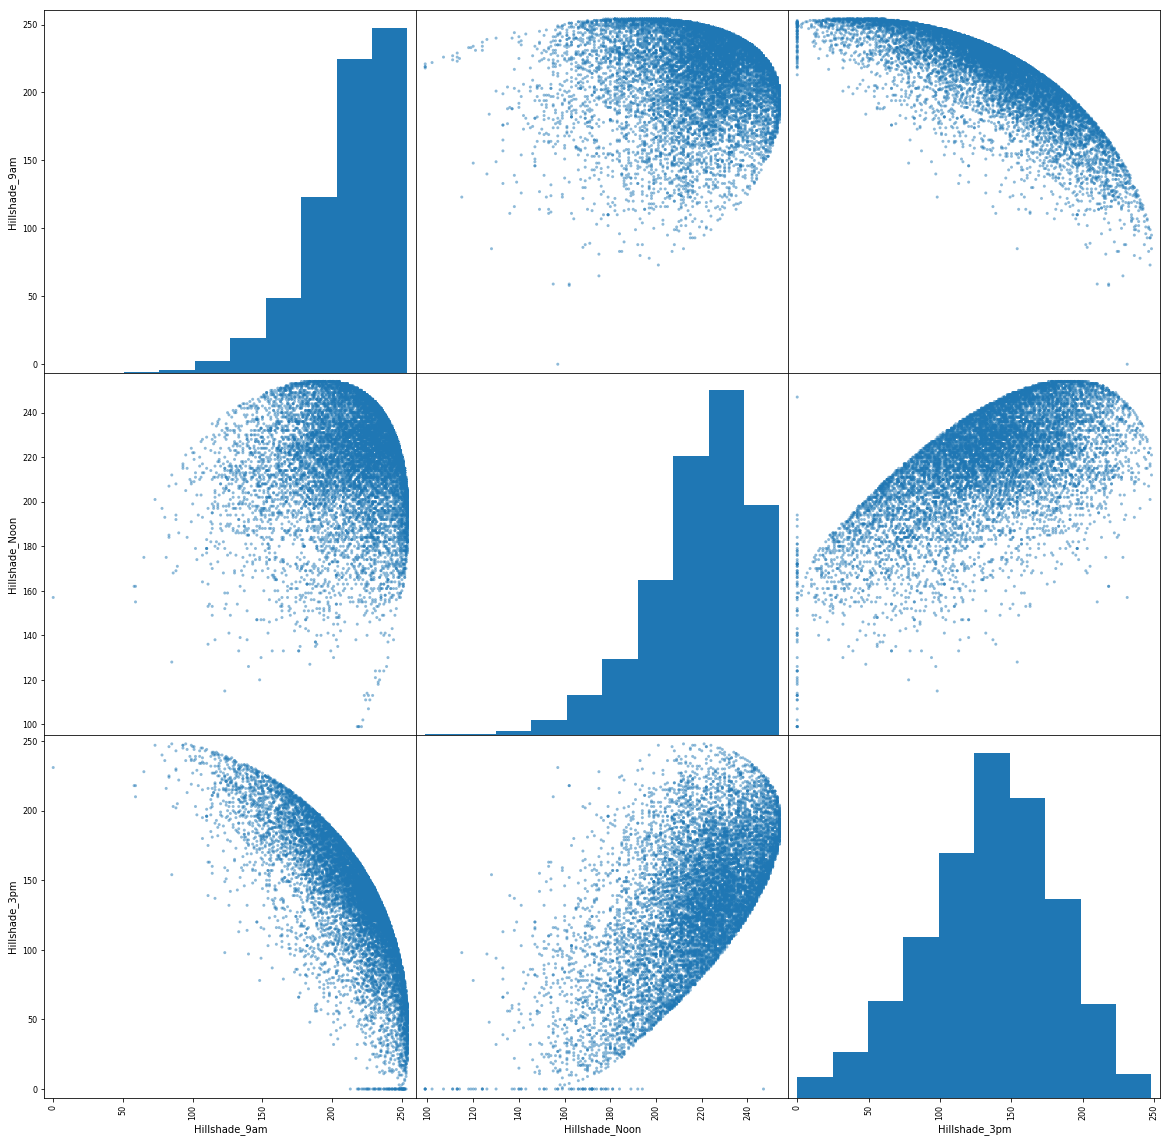

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]
scatter_matrix(train_features[attributes], figsize=(20,20))

In [14]:
for col in ["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]:
    median = data[col].median()
    train_features[col] = np.floor(train_features[col] / median)
    validation_features[col] = np.floor(validation_features[col] / median)
    test_features[col] = np.floor(test_features[col] / median)
    

In [15]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12096 entries, 14128 to 11291
Data columns (total 48 columns):
Elevation                             12096 non-null int64
Aspect                                12096 non-null int64
Slope                                 12096 non-null int64
Horizontal_Distance_To_Hydrology      12096 non-null int64
Vertical_Distance_To_Hydrology        12096 non-null int64
Horizontal_Distance_To_Roadways       12096 non-null int64
Hillshade_9am                         12096 non-null float64
Hillshade_Noon                        12096 non-null float64
Hillshade_3pm                         12096 non-null float64
Horizontal_Distance_To_Fire_Points    12096 non-null int64
Wilderness_Area1                      12096 non-null int64
Wilderness_Area2                      12096 non-null int64
Wilderness_Area3                      12096 non-null int64
Wilderness_Area4                      12096 non-null int64
Soil_Type1                            12096 non-null in

In [16]:
from sklearn.decomposition import PCA

def get_dims_variances(x, minDim, tol=None, thres=0.01):
    dims = []
    variances = []
    optimum_dim = minDim
    prev_min_variance = None
    dim = minDim
    
    while(True):
        pca = PCA(n_components=dim)
        pca.fit(x)
        variance = np.array(pca.explained_variance_ratio_)
        min_variance = variance.min()
        
        dims.append(dim)
        variances.append(min_variance)
        
        if tol != None and prev_min_variance != None and min_variance + tol > prev_min_variance:
            break

        else:
            if prev_min_variance != None and min_variance < thres:
                break
                
        prev_min_variance = min_variance
        optimum_dim = dim
        dim = dim + 1
    
    dim_df = pd.DataFrame()
    dim_df["DIM"] = dims
    dim_df["VAR"] = variances
    
    return dim_df, optimum_dim

In [17]:
if doPCA:
    dim_df, optimum_dimension = get_dims_variances(x=data, minDim=2, thres=0.001)
    print("Optimum dimensions ", optimum_dimension)
    
    import matplotlib.pyplot as plt
    plt.plot(dim_df["DIM"], dim_df["VAR"])
    plt.show()
    print(dim_df)
    
    pca = PCA(n_components=optimum_dimension)
    pca.fit(train_features)

    train_features = pca.transform(train_features)
    validation_features = pca.transform(validation_features)
    test_features = pca.transform(test_features)
    
else:
    train_features = train_features.values
    validation_features = validation_features.values
    test_features = test_features.values

In [18]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(train_features)

train_features = imputer.transform(train_features)
validation_features = imputer.transform(validation_features)
test_features = imputer.transform(test_features)

In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(train_features)

train_features = scalar.transform(train_features)
validation_features = scalar.transform(validation_features)
test_features = scalar.transform(test_features)

In [20]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.base import clone

sgd_clf = SGDClassifier(random_state=42, penalty="l2")
print("Cross Val Scores on training set\n", cross_val_score(clone(sgd_clf), train_features, train_labels, cv=3, scoring="accuracy"))


sgd_clf.fit(train_features, train_labels)
print("\n\nAccuracy on testing data set\n", sum(validation_labels == sgd_clf.predict(validation_features)) / len(validation_labels))


Cross Val Scores on training set
 [0.56225198 0.58134921 0.57936508]


Accuracy on testing data set
 0.5730820105820106


In [21]:
# KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV


knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=3, algorithm='auto')
print("Cross Val Scores on training set\n", cross_val_score(clone(knn_clf), train_features, train_labels, cv=3, scoring="accuracy"))

knn_clf.fit(train_features, train_labels)
print("\n\nAccuracy on testing data set\n", sum(validation_labels == knn_clf.predict(validation_features)) / len(validation_labels))


Cross Val Scores on training set
 [0.73883929 0.7609127  0.74826389]


Accuracy on testing data set
 0.7761243386243386


In [22]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

gridSearch = False
if gridSearch:
    
    parameters = {
        'n_estimators' : [64, 128, 256, 512]
    }

    forest_clf = RandomForestClassifier(random_state=42, oob_score=True)
    clf = GridSearchCV(forest_clf, parameters)
    clf.fit(train_features, train_labels)
    print(clf.best_params_)

forest_clf = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=512)
print("Cross Val Scores on training set\n", cross_val_score(clone(forest_clf), train_features, train_labels, cv=3, scoring="accuracy"))

forest_clf.fit(train_features, train_labels)
print("\n\nAccuracy on testing data set\n", sum(validation_labels == forest_clf.predict(validation_features)) / len(validation_labels))


Cross Val Scores on training set
 [0.85193452 0.85565476 0.85689484]


Accuracy on testing data set
 0.8591269841269841


In [23]:
# SVM Classifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

gridSearch = False
if gridSearch:
    
    parameters = {
        'kernel' : ['rbf'],
        'C' : [4.2],
        'gamma' : [0.225, 0.25, 0.275]
    }

    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters)
    clf.fit(train_features, train_labels)
    print(clf.best_params_)

svm_clf = svm.SVC(kernel='rbf', C=4.2, gamma=0.25)
print("Cross Val Scores on training set\n", cross_val_score(clone(svm_clf), train_features, train_labels, cv=3, scoring="accuracy"))

svm_clf.fit(train_features, train_labels)
print("\n\nAccuracy on testing data set\n", sum(validation_labels == svm_clf.predict(validation_features)) / len(validation_labels))


Cross Val Scores on training set
 [0.78918651 0.79588294 0.796875  ]


Accuracy on testing data set
 0.8045634920634921


In [24]:
forest_clf = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=512)
all_features = np.concatenate((train_features, validation_features), axis=0)
all_labels = np.concatenate((train_labels, validation_labels), axis=0)
forest_clf.fit(all_features, all_labels)
print("\n\nAccuracy on testing data set\n", sum(validation_labels == forest_clf.predict(validation_features)) / len(validation_labels))




Accuracy on testing data set
 1.0


In [25]:
results_df = pd.DataFrame(columns=["Id", KEY])
results_df["Id"] = testIds
results_df[KEY] = forest_clf.predict(test_features)

In [26]:
results_df

,Id,Cover_Type
0,15121,2
1,15122,1
2,15123,2
3,15124,2
4,15125,2
5,15126,2
6,15127,2
7,15128,1
8,15129,1
9,15130,1


In [27]:
results_df.to_csv("results.csv", index=False)